<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/lecturadedatosabiertoscmszmumu-Carrazko/blob/main/CMSOpenDataZtoMuMu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **✦✦✦Partículas Datos✦✦✦**

Alejandro Hernández Carrasco, 23 de Junio de 2025

## 0.- Carga de Datos

In [1]:
import pandas as pd #panda nos permite manipular el archivo csv https://pandas.pydata.org
import numpy as np #numpy nos permite hacer operaciones usando vectores https://numpy.org
import plotly.express as px #plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

#Ponemos el .csv en un DataFrame
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',') #usamos la liga que está directamente en la página.

## 1.- Información Inmediata

In [2]:
#Vista de nustros datos
particles

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,173692,1245050481,8.9721,-1.6158,-2.7176,1,-0.0294,8.7183,13.5266,1.8709,2.7911,1,-0.0689,0.4202
9996,173692,1244979327,39.4543,-1.1310,-2.0568,1,0.0417,0.0000,47.7209,-0.1834,1.7965,-1,-0.0794,0.0000
9997,173692,1245305163,40.6034,-1.5051,-1.6758,-1,0.0635,0.2012,44.4382,-1.0010,1.5380,1,-0.0671,1.1499
9998,173692,1245041468,37.2853,1.0024,-2.1486,1,0.0361,0.0000,41.0945,-0.1200,0.8850,-1,-0.0291,0.0000


In [3]:
#Información de cada columna de datos
particles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     10000 non-null  int64  
 1   Event   10000 non-null  int64  
 2   pt1     10000 non-null  float64
 3   eta1    10000 non-null  float64
 4   phi1    10000 non-null  float64
 5   Q1      10000 non-null  int64  
 6   dxy1    10000 non-null  float64
 7   iso1    10000 non-null  float64
 8   pt2     10000 non-null  float64
 9   eta2    10000 non-null  float64
 10  phi2    10000 non-null  float64
 11  Q2      10000 non-null  int64  
 12  dxy2    10000 non-null  float64
 13  iso2    10000 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 1.1 MB


In [4]:
#Porcentajes de carga de la partícula 1
particles['Q1'].value_counts()

,count
Q1,
-1,5156
1,4844


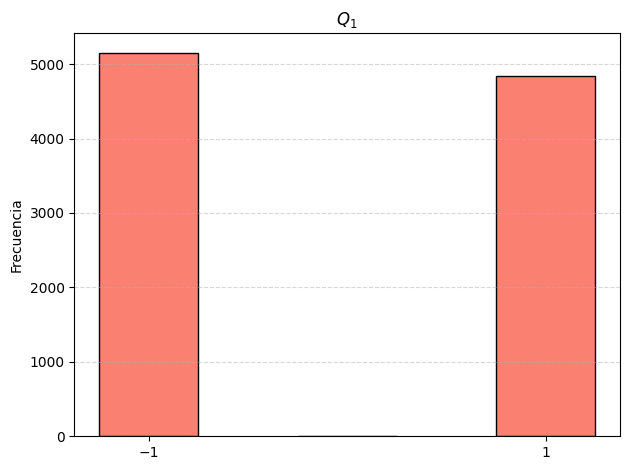

In [5]:
# Hacer histograma
plt.hist(particles['Q1'], bins=[-1.5, -0.5, 0.5, 1.5], align='mid', rwidth=0.5, color='salmon', edgecolor='black')
plt.title(r'$Q_1$')
plt.ylabel('Frecuencia')
plt.xticks([-1, 1])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [6]:
#Porcentajes de carga de la partícula 2
particles['Q2'].value_counts()

,count
Q2,
1,5192
-1,4808


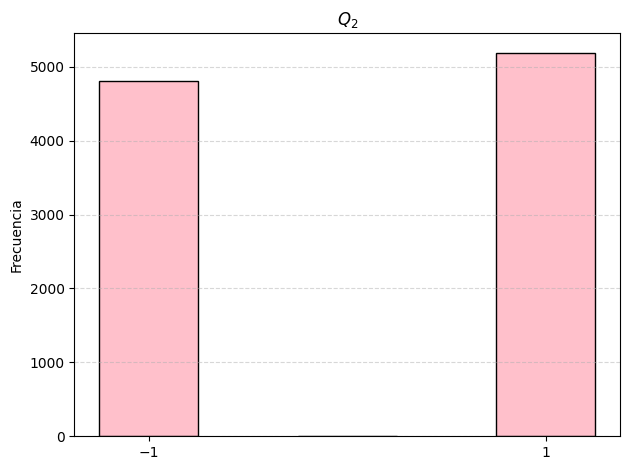

In [7]:
# Hacer histograma
plt.hist(particles['Q2'], bins=[-1.5, -0.5, 0.5, 1.5], align='mid', rwidth=0.5, color='pink', edgecolor='black')
plt.title(r'$Q_2$')
plt.ylabel('Frecuencia')
plt.xticks([-1, 1])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 3.- Bozones Z_0

Vamos a analizar las cargas y calcularemos la Masa Invariante

In [8]:
df = particles #Nuevo dataframe para no trabajar sobre los datos originales

df['QT'] = particles['Q1'] + particles['Q2'] # Carga Total

# Masa Invariante
df['M'] = np.sqrt( 2 * particles['pt1'] * particles['pt2'] * (np.cosh(particles['eta1'] - particles['eta2']) - np.cos(particles['phi1'] - particles['phi2'])))
df['M_r'] = np.round(particles['M']) #Masa Invariante Redondeada

df

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2,QT,M,M_r
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221,0,89.885919,90.0
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000,0,88.812177,89.0
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000,0,88.474683,88.0
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000,0,90.332429,90.0
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000,0,90.515882,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,173692,1245050481,8.9721,-1.6158,-2.7176,1,-0.0294,8.7183,13.5266,1.8709,2.7911,1,-0.0689,0.4202,2,61.612327,62.0
9996,173692,1244979327,39.4543,-1.1310,-2.0568,1,0.0417,0.0000,47.7209,-0.1834,1.7965,-1,-0.0794,0.0000,0,91.859015,92.0
9997,173692,1245305163,40.6034,-1.5051,-1.6758,-1,0.0635,0.2012,44.4382,-1.0010,1.5380,1,-0.0671,1.1499,0,87.614328,88.0
9998,173692,1245041468,37.2853,1.0024,-2.1486,1,0.0361,0.0000,41.0945,-0.1200,0.8850,-1,-0.0291,0.0000,0,90.844048,91.0


De momento no nos enfocaremos en todos los datos

In [9]:
df[['Run', 'Event', 'QT', 'M_r']]

,Run,Event,QT,M_r
0,165617,74969122,0,90.0
1,165617,75138253,0,89.0
2,165617,75887636,0,88.0
3,165617,75779415,0,90.0
4,165617,75098104,0,91.0
...,...,...,...,...
9995,173692,1245050481,2,62.0
9996,173692,1244979327,0,92.0
9997,173692,1245305163,0,88.0
9998,173692,1245041468,0,91.0


In [10]:
df['QT'].value_counts()

,count
QT,
0,9664
2,186
-2,150


In [11]:
df['M_r'].describe()

,M_r
count,10000.000000
mean,87.973100
std,8.843427
min,60.000000
25%,87.000000
50%,90.000000
75%,92.000000
max,120.000000


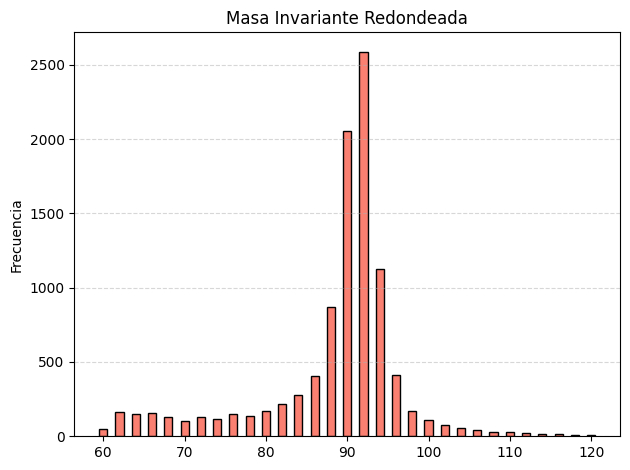

In [12]:
# Hacer histograma

plt.hist(df['M_r'], list(range(59, 122, 2)) , align='mid', rwidth=0.5, color='salmon', edgecolor='black')
plt.title(r'Masa Invariante Redondeada')
plt.ylabel('Frecuencia')
#plt.xticks(list(range(60, 122, 2)))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()